In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\ACER\RegenAI-Tasks\qld_emissions\AES\Australian Energy Statistics 2023 Table C Fuel - machine-readable.csv")
df.head()

,Jurisdiction,Year,Fuel,Unit,Quantity
0,AUS,1960-61,Coal,PJ,na
1,AUS,1960-61,Gas,PJ,0
2,AUS,1960-61,Oil,PJ,510
3,AUS,1960-61,Renewables,PJ,189.1
4,AUS,1960-61,Statistical Discrepancy,PJ,na


In [6]:
# Xem các giá trị duy nhất của mỗi cột
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()


Unique values in 'Jurisdiction':
['AUS' 'NSW' 'NT' 'QLD' 'SA' 'TAS' 'VIC' 'WA']

Unique values in 'Year':
['1960-61' '1961-62' '1962-63' '1963-64' '1964-65' '1965-66' '1966-67'
 '1967-78' '1968-69' '1969-70' '1970-71' '1971-72' '1972-73' '1973-74'
 '1974-75' '1975-76' '1976-77' '1977-78' '1978-79' '1979-80' '1980-81'
 '1981-82' '1982-83' '1983-84' '1984-85' '1985-86' '1986-87' '1987-88'
 '1988-89' '1989-90' '1990-91' '1991-92' '1992-93' '1993-94' '1994-95'
 '1995-96' '1996-97' '1997-98' '1998-99' '1999-00' '2000-01' '2001-02'
 '2002-03' '2003-04' '2004-05' '2005-06' '2006-07' '2007-08' '2008-09'
 '2009-10' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16'
 '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2021-22']

Unique values in 'Fuel':
['Coal' 'Gas' 'Oil' 'Renewables' 'Statistical Discrepancy' 'Total']

Unique values in 'Unit':
['PJ']

Unique values in 'Quantity':
['na' '0' '510' '189.1' '1336.6' '537.3' '185.6' '1365.8' '0.1' '581.9'
 '194.6' '1432.2' '656.8' '188.9' '

In [7]:
# Lọc dữ liệu để chỉ giữ các hàng có Jurisdiction là 'QLD'
df_ql = df.loc[df['Jurisdiction'] == 'QLD']

# Hiển thị DataFrame đã lọc
print(df_ql)

    Jurisdiction     Year                     Fuel Unit  Quantity
540          QLD  2008-09                     Coal   PJ   629.212
541          QLD  2008-09                      Gas   PJ   187.938
542          QLD  2008-09                      Oil   PJ   469.531
543          QLD  2008-09               Renewables   PJ    77.402
544          QLD  2008-09  Statistical Discrepancy   PJ   -18.354
..           ...      ...                      ...  ...       ...
619          QLD  2021-22                      Gas   PJ   305.693
620          QLD  2021-22                      Oil   PJ    504.67
621          QLD  2021-22               Renewables   PJ   142.953
622          QLD  2021-22  Statistical Discrepancy   PJ   -11.138
623          QLD  2021-22                    Total   PJ  1427.825

[84 rows x 5 columns]


C:\Users\ACER\AppData\Local\Temp\ipykernel_20832\1303841380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ql['Quantity'] = pd.to_numeric(df_ql['Quantity'], errors='coerce')


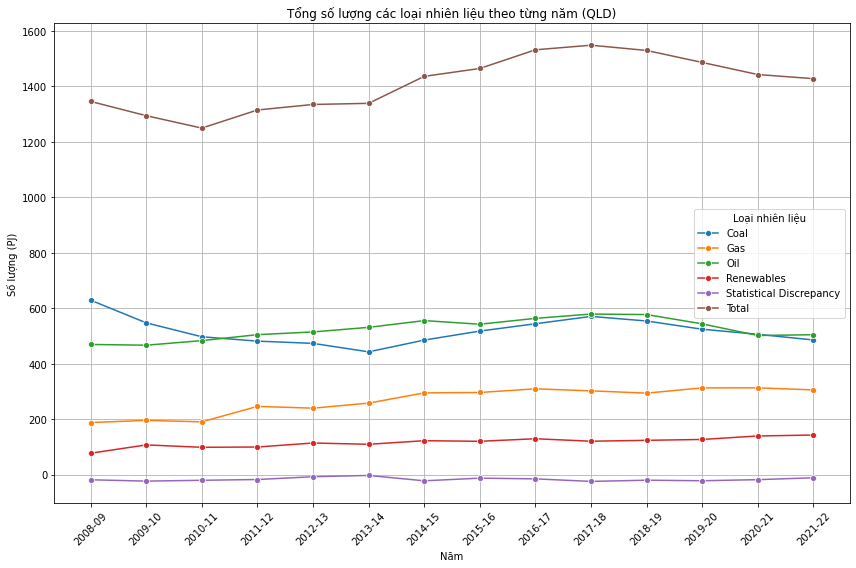

In [10]:
# Loại bỏ các giá trị 'na' và chuyển đổi giá trị Quantity sang kiểu số thực (float)
df_ql['Quantity'] = pd.to_numeric(df_ql['Quantity'], errors='coerce')

# Tính tổng số lượng của từng loại nhiên liệu theo từng năm
df_grouped = df_ql.groupby(['Year', 'Fuel'])['Quantity'].sum().reset_index()

# Vẽ biểu đồ số lượng các loại nhiên liệu theo từng năm
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_grouped, x='Year', y='Quantity', hue='Fuel', marker='o')

# Tinh chỉnh biểu đồ
plt.title('Tổng số lượng các loại nhiên liệu theo từng năm (QLD)')
plt.xlabel('Năm')
plt.ylabel('Số lượng (PJ)')
plt.legend(title='Loại nhiên liệu')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [17]:
df2 = pd.read_csv(r"C:\Users\ACER\RegenAI-Tasks\qld_emissions\AES\Australian Energy Statistics 2023 Table E - machine-readable.csv")
df2.head()

,Jurisdiction,Year,Industry,Unit,Quantity
0,AUS,1973-74,Agriculture,PJ,38.7
1,AUS,1973-74,Commercial and services,PJ,80.0
2,AUS,1973-74,Construction,PJ,25.9
3,AUS,1973-74,Electricity generation,PJ,509.6
4,AUS,1973-74,Manufacturing,PJ,918.0


In [19]:
# Xem các giá trị duy nhất của mỗi cột
for column in df2.columns:
    unique_values = df2[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Jurisdiction':
['AUS' 'NSW' 'NT' 'QLD' 'SA' 'TAS' 'VIC' 'WA']

Unique values in 'Year':
['1973-74' '1974-75' '1975-76' '1976-77' '1977-78' '1978-79' '1979-80'
 '1980-81' '1981-82' '1982-83' '1983-84' '1984-85' '1985-86' '1986-87'
 '1987-88' '1988-89' '1989-90' '1990-91' '1991-92' '1992-93' '1993-94'
 '1994-95' '1995-96' '1996-97' '1997-98' '1998-99' '1999-00' '2000-01'
 '2001-02' '2002-03' '2003-04' '2004-05' '2005-06' '2006-07' '2007-08'
 '2008-09' '2009-10' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15'
 '2015-16' '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2021-22']

Unique values in 'Industry':
['Agriculture' 'Commercial and services' 'Construction'
 'Electricity generation' 'Manufacturing' 'Mining' 'Other' 'Residential'
 'Total' 'Transport' 'Water and waste']

Unique values in 'Unit':
['PJ']

Unique values in 'Quantity':
[  38.7     80.      25.9   ... 1257.818  237.658    3.565]



In [20]:
# Lọc dữ liệu để chỉ giữ các hàng có Jurisdiction là 'QLD'
df_ql = df2.loc[df['Jurisdiction'] == 'QLD']

# Hiển thị DataFrame đã lọc
print(df_ql)

     Jurisdiction     Year                 Industry Unit  Quantity
1617          QLD  1973-74              Agriculture   PJ    10.300
1618          QLD  1973-74  Commercial and services   PJ     8.600
1619          QLD  1973-74             Construction   PJ     6.800
1620          QLD  1973-74   Electricity generation   PJ    64.000
1621          QLD  1973-74            Manufacturing   PJ   147.700
...           ...      ...                      ...  ...       ...
2151          QLD  2021-22                    Other   PJ    12.553
2152          QLD  2021-22              Residential   PJ    72.322
2153          QLD  2021-22                    Total   PJ  1427.825
2154          QLD  2021-22                Transport   PJ   336.874
2155          QLD  2021-22          Water and waste   PJ     2.889

[539 rows x 5 columns]


C:\Users\ACER\AppData\Local\Temp\ipykernel_20832\2197336433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ql['Quantity'] = pd.to_numeric(df_ql['Quantity'], errors='coerce')


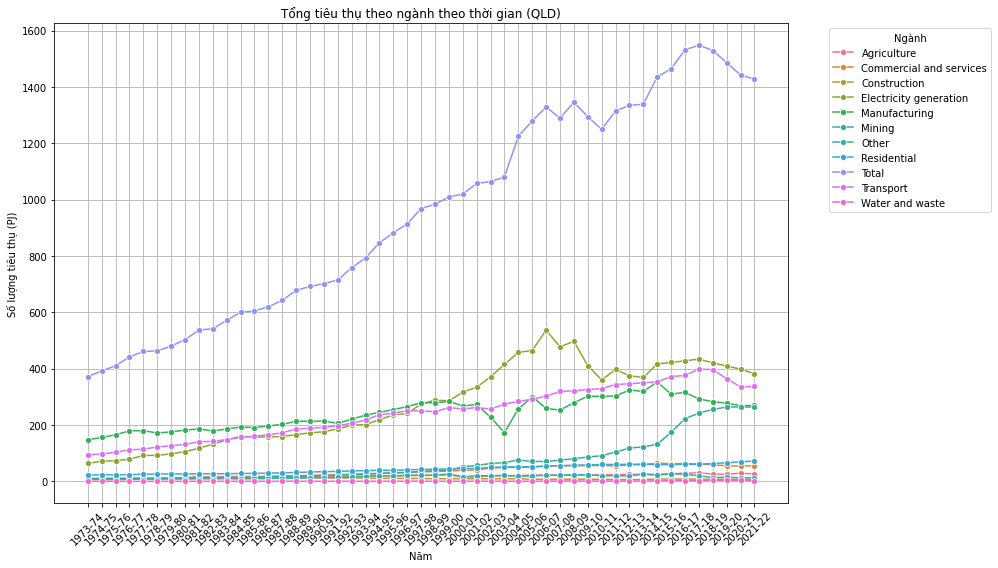

In [21]:
# Loại bỏ các giá trị 'na' và chuyển đổi giá trị Quantity sang kiểu số thực (float)
df_ql['Quantity'] = pd.to_numeric(df_ql['Quantity'], errors='coerce')

# Nhóm dữ liệu theo Year và Industry và tính tổng số lượng
df_grouped = df_ql.groupby(['Year', 'Industry'])['Quantity'].sum().reset_index()

# Vẽ biểu đồ tiêu thụ theo từng ngành theo thời gian
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_grouped, x='Year', y='Quantity', hue='Industry', marker='o')

# Tinh chỉnh biểu đồ
plt.title('Tổng tiêu thụ theo ngành theo thời gian (QLD)')
plt.xlabel('Năm')
plt.ylabel('Số lượng tiêu thụ (PJ)')
plt.legend(title='Ngành', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [48]:
df3 = pd.read_csv(r"C:\Users\ACER\RegenAI-Tasks\qld_emissions\AES\Australian Energy Statistics 2023 Table H Industry - machine-readable.csv")
df3 = df3[df3['Fuel'] != 'Total final energy consumption']
df3 = df3[df3['Industry'] != 'Total final consumption']
df3.head()

,Industry,Fuel,Year,Unit,Quantity
0,Agriculture,Coal,2002-03,PJ,NaN
1,Agriculture,Coal,2003-04,PJ,NaN
2,Agriculture,Coal,2004-05,PJ,NaN
3,Agriculture,Coal,2005-06,PJ,NaN
4,Agriculture,Coal,2006-07,PJ,NaN


In [49]:
# Xem các giá trị duy nhất của mỗi cột
for column in df3.columns:
    unique_values = df3[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Industry':
['Agriculture' 'Air transport' 'Chemical' 'Commercial and services'
 'Construction' 'Food, beverages, textiles' 'Iron and steel'
 'Lubricants, bitumen, solvents' 'Mining' 'Non-ferrous metals'
 'Other industry' 'Other transport, services and storage' 'Rail transport'
 'Residential' 'Road transport' 'Total Manufacturing' 'Total Transport'
 'Water and waste' 'Water transport' 'Wood, paper and printing']

Unique values in 'Fuel':
['Coal' 'Electricity' 'Gas' 'Oil' 'Renewables' 'Total']

Unique values in 'Year':
['2002-03' '2003-04' '2004-05' '2005-06' '2006-07' '2007-08' '2008-09'
 '2009-10' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16'
 '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2021-22']

Unique values in 'Unit':
['PJ']

Unique values in 'Quantity':
[   nan  9.92   9.64  ... 52.183 52.285 52.521]



In [50]:
# Loại bỏ các giá trị 'na' và chuyển đổi giá trị Quantity sang kiểu số thực (float)
df3['Quantity'] = pd.to_numeric(df3['Quantity'], errors='coerce')

C:\Users\ACER\AppData\Local\Temp\ipykernel_20832\3679546845.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, y='Fuel', x='Quantity', palette='viridis')


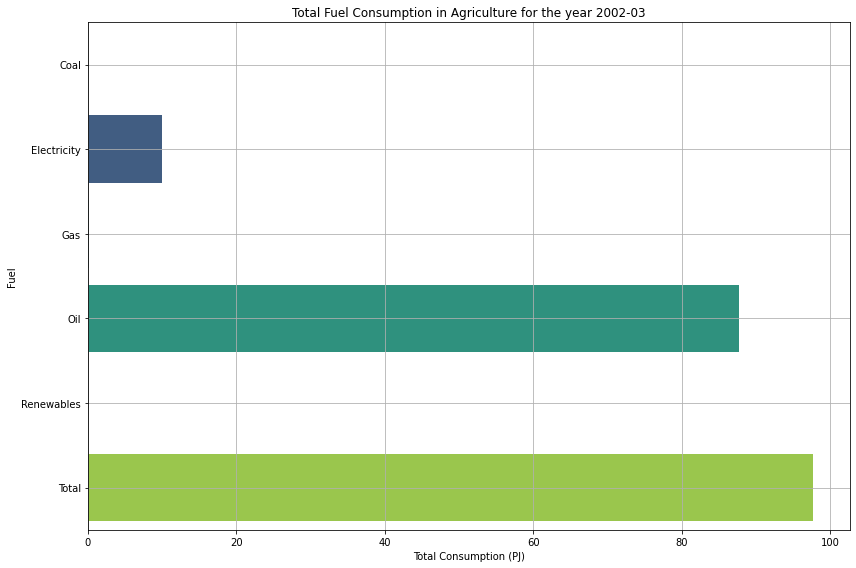

In [51]:

def plot_fuel_consumption_by_industry(dataframe, industry, year):
    # Chuyển Quantity thành số thực (float)
    dataframe['Quantity'] = pd.to_numeric(dataframe['Quantity'], errors='coerce')
    
    # Nhóm dữ liệu theo Industry, Year, và Fuel và tính tổng số lượng tiêu thụ
    df_grouped = dataframe.groupby(['Industry', 'Year', 'Fuel'])['Quantity'].sum().reset_index()
    
    # Lọc dữ liệu cho ngành và năm cụ thể
    df_filtered = df_grouped[(df_grouped['Industry'] == industry) & (df_grouped['Year'] == year)]
    
    # Vẽ biểu đồ thanh ngang
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_filtered, y='Fuel', x='Quantity', palette='viridis')
    
    # Tinh chỉnh biểu đồ
    plt.title(f'Total Fuel Consumption in {industry} for the year {year}')
    plt.xlabel('Total Consumption (PJ)')
    plt.ylabel('Fuel')
    plt.grid(True)
    plt.tight_layout()
    
    # Hiển thị biểu đồ
    plt.show()


# Gọi hàm với các tham số cụ thể
plot_fuel_consumption_by_industry(df3, industry='Agriculture', year='2002-03')

C:\Users\ACER\AppData\Local\Temp\ipykernel_20832\2600644632.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, y='Industry', x='Quantity', palette='viridis')


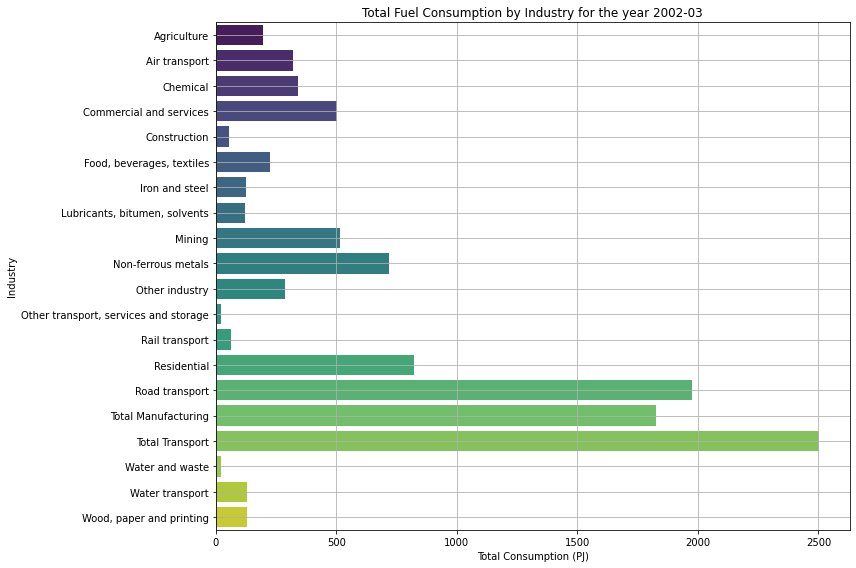

In [52]:
def plot_industry(dataframe, year):
    # Chuyển Quantity thành số thực (float)
    dataframe['Quantity'] = pd.to_numeric(dataframe['Quantity'], errors='coerce')
    
    # Nhóm dữ liệu theo Industry, Year và tính tổng số lượng tiêu thụ
    df_grouped = dataframe.groupby(['Industry', 'Year'])['Quantity'].sum().reset_index()
    
    # Lọc dữ liệu cho năm cụ thể
    df_filtered = df_grouped[df_grouped['Year'] == year]
    
    # Vẽ biểu đồ thanh ngang
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_filtered, y='Industry', x='Quantity', palette='viridis')
    
    # Tinh chỉnh biểu đồ
    plt.title(f'Total Fuel Consumption by Industry for the year {year}')
    plt.xlabel('Total Consumption (PJ)')
    plt.ylabel('Industry')
    plt.grid(True)
    plt.tight_layout()
    
    # Hiển thị biểu đồ
    plt.show()


# Gọi hàm với năm cụ thể
plot_industry(df3, year='2002-03')

In [60]:
df4 = pd.read_csv(r"C:\Users\ACER\RegenAI-Tasks\qld_emissions\AES\Australian Energy Statistics 2023 Table K - machine-readable.csv")
df4 = df4[df4['Industry'] != 'Total']
df4.head()

,Jurisdiction,Industry,Fuel,Unit,Quantity
0,AUS,Agriculture,Black coal,PJ,NaN
1,AUS,Agriculture,Diesel,PJ,97.102
2,AUS,Agriculture,Electricity,PJ,6.351
3,AUS,Agriculture,Natural gas,PJ,1.225
4,AUS,Agriculture,Petrol,PJ,7.201


In [61]:
df_ql = df4.loc[df['Jurisdiction'] == 'QLD']
for column in df3.columns:
    unique_values = df3[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Industry':
['Agriculture' 'Air transport' 'Chemical' 'Commercial and services'
 'Construction' 'Food, beverages, textiles' 'Iron and steel'
 'Lubricants, bitumen, solvents' 'Mining' 'Non-ferrous metals'
 'Other industry' 'Other transport, services and storage' 'Rail transport'
 'Residential' 'Road transport' 'Total Manufacturing' 'Total Transport'
 'Water and waste' 'Water transport' 'Wood, paper and printing']

Unique values in 'Fuel':
['Coal' 'Electricity' 'Gas' 'Oil' 'Renewables' 'Total']

Unique values in 'Year':
['2002-03' '2003-04' '2004-05' '2005-06' '2006-07' '2007-08' '2008-09'
 '2009-10' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16'
 '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2021-22']

Unique values in 'Unit':
['PJ']

Unique values in 'Quantity':
[   nan  9.92   9.64  ... 52.183 52.285 52.521]



C:\Users\ACER\AppData\Local\Temp\ipykernel_20832\3317939233.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, y='Fuel', x='Quantity', palette='viridis')


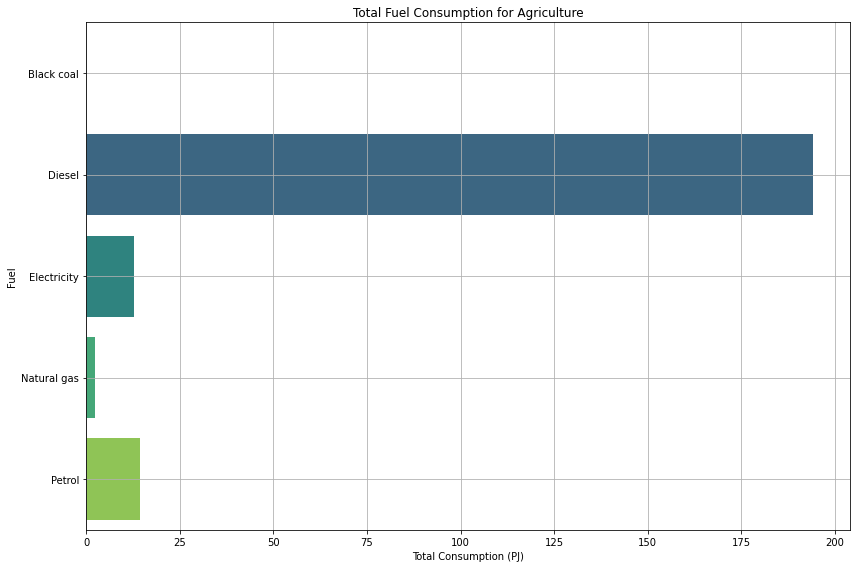

In [62]:
def plot_total_consumption_by_industry(dataframe, industry):
    # Chuyển Quantity thành số thực (float)
    dataframe['Quantity'] = pd.to_numeric(dataframe['Quantity'], errors='coerce')
    
    # Nhóm dữ liệu theo Industry và Fuel và tính tổng số lượng tiêu thụ
    df_grouped = dataframe.groupby(['Industry', 'Fuel'])['Quantity'].sum().reset_index()
    
    # Lọc dữ liệu cho ngành cụ thể
    df_filtered = df_grouped[df_grouped['Industry'] == industry]
    
    # Vẽ biểu đồ thanh ngang
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_filtered, y='Fuel', x='Quantity', palette='viridis')
    
    # Tinh chỉnh biểu đồ
    plt.title(f'Total Fuel Consumption for {industry}')
    plt.xlabel('Total Consumption (PJ)')
    plt.ylabel('Fuel')
    plt.grid(True)
    plt.tight_layout()
    
    # Hiển thị biểu đồ
    plt.show()


# Gọi hàm với ngành cụ thể
plot_total_consumption_by_industry(df4, industry='Agriculture')

C:\Users\ACER\AppData\Local\Temp\ipykernel_20832\2119200716.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, y='Industry', x='Quantity', palette='viridis')


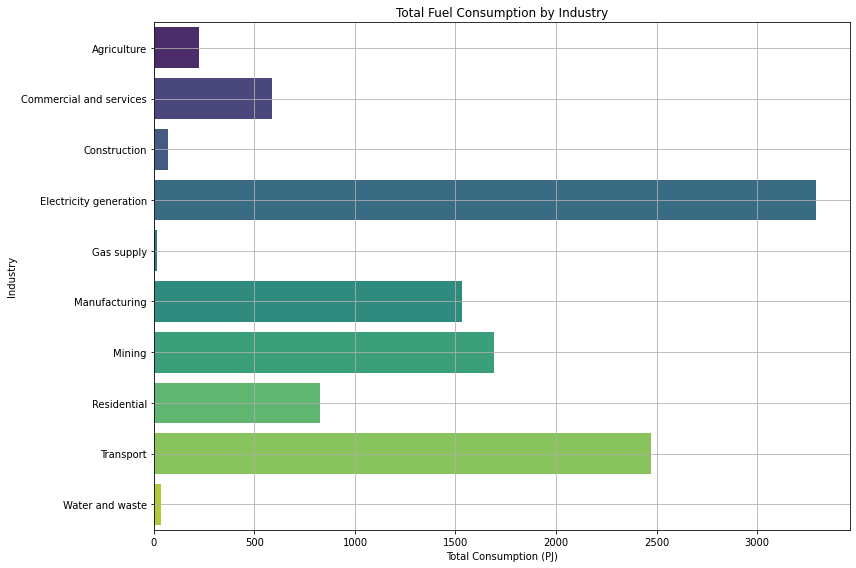

In [63]:
def plot_total_consumption_by_industry_summary(dataframe):
    # Chuyển Quantity thành số thực (float)
    dataframe['Quantity'] = pd.to_numeric(dataframe['Quantity'], errors='coerce')
    
    # Nhóm dữ liệu theo Industry và tính tổng số lượng tiêu thụ
    df_grouped = dataframe.groupby(['Industry'])['Quantity'].sum().reset_index()
    
    # Vẽ biểu đồ thanh ngang
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_grouped, y='Industry', x='Quantity', palette='viridis')
    
    # Tinh chỉnh biểu đồ
    plt.title('Total Fuel Consumption by Industry')
    plt.xlabel('Total Consumption (PJ)')
    plt.ylabel('Industry')
    plt.grid(True)
    plt.tight_layout()
    
    # Hiển thị biểu đồ
    plt.show()


# Gọi hàm để vẽ tổng tiêu thụ theo ngành
plot_total_consumption_by_industry_summary(df4)